In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Untuk interaktif
import plotly.express as px
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv


In [46]:
PATH = '/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv'
try:
    df = pd.read_csv(PATH) 
except FileNotFoundError:
    print(f"Pastikan file '{PATH}' ada di direktori yang sama.")
    exit()

print("--- 5 first row of data ---")
print(df.head())
print("\n")

print("--- data information ---")
df.info()
print("\n")

print("--- Descriptive statistics ---")
print(df.describe())
print("\n")

print("--- number of missing value ---")
print(df.isnull().sum())

--- 5 first row of data ---
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


--- data information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


--- Descriptive statistics ---
              Open         High          Low        Close        Volume
count  1511.000000  1

# 🗂 Data preparation

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

print("--- Data information afters conversion ---")
df.info()
print("\n")

print("--- 5 first rows after convertions ---")
print(df.head())

--- Data information afters conversion ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


--- 5 first rows after convertions ---
                      Open   High    Low  Close    Volume
Date                                                     
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438


In [49]:
df.sort_index(inplace=True)

print(f"Number of duplicate date entry: {df.index.duplicated().sum()}")
if df.index.duplicated().any():
    print("Handling duplicates (if any)    ")
    df = df[~df.index.duplicated(keep='last')]
    print(f"Number of duplicate date entry after handling: {df.index.duplicated().sum()}")

price_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in harga_kolom:
    if (df[col] < 0).any():
        print(f"Warning: Column '{col}' contains negative values.")
    if (df[col] == 0).any() and col != 'Volume': 
        print(f"Warning: Column '{col}' contains unexpeted-zero values.")

if (df['Volume'] < 0).any():
    print("Warning: Column 'Volume' contains negative value.")

Number of duplicate date entry: 0


# 📊EDA (Exploratory Data Analyst) & Stock Price Trend Visualization

In [81]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Open'],
                         mode='lines',
                         name='Open',
                         line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df.index, y=df['Close'],
                         mode='lines',
                         name='Close',
                         line=dict(color='royalblue')))

fig.update_layout(title_text='Microsoft (MSFT) Stock Price Trend',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  hovermode='x unified',
                  template='plotly_white')
fig.show()

**💡 Analysis Microsoft (MSFT) Stock Price Trend 2015-2021**
1. Overall Trend: Strong Exponential Growth
    * The chart shows Microsoft’s stock price trending consistently and significantly upward from 2015 to 2021. The near-exponential growth spurt that began around the end of 2019 and continued into 2021 is particularly evident. This strong positive trend underscores the company’s solid fundamental performance and continued investor confidence in its innovation and position in the technology market.

2. Volatility and Market Response to Macro Events
    While the general trend is up, there are periods of volatility that indicate the market’s response to external events:

    * **December 2018**: There was a price decline that, while relatively small in terms of the long-term trend, was likely driven by concerns about a global economic slowdown and tensions in international relations between the United States during that period. This highlights how macro market sentiment can affect even blue-chip stocks.

    * **January-March 2020**: The onset of the COVID-19 pandemic triggered a sharper decline and significant fluctuations in the market. What is interesting, however, is the speed of MSFT’s subsequent recovery. Microsoft showed remarkable resilience, with its price not only recovering but also surpassing pre-pandemic levels quickly, likely driven by increased adoption of cloud services and the need for remote working solutions offered by the company.  

In [82]:
fig_ohlc = go.Figure(data=[go.Candlestick(x=df.index,
                                          open=df['Open'],
                                          high=df['High'],
                                          low=df['Low'],
                                          close=df['Close'],
                                          name='MSFT Stock Price')])

fig_ohlc.update_layout(title_text='Microsoft Stock Price Movement (OHLC) - Candlestick Chart',
                      xaxis_title='Date',
                      yaxis_title='Price (USD)',
                      xaxis_rangeslider_visible=False,
                      template='plotly_white')

fig_ohlc.show()

**💡 Analysis Microsoft (MSFT) Stock Price Movement 2015-2021**

1. **Intraday Price Stability with Long-Term Uptrend**:
    * A key observation from this chart is that the intraday price movements (the difference between the open and close on the same day, represented by the ‘body’ of the candle) tend not to be too extreme. This suggests that most of the time, Microsoft’s stock price is relatively stable within a single trading day.
      
2. **Price Gains Occur Between Days (Long-Term Trend)**:
    * Rather than large fluctuations within a single day, significant price increases more often occur when there is a 'gap' or substantial price change from the previous day's close to the next day's open, or an accumulation of gains from day to day. This is seen by the number of green candles (closes higher than the open) and an overall trend that shows an upward price shift from one day to the next.
      
3. **Strong Long-Term Trend Visualization**:
    * Despite the daily fluctuations, the dominance of green candles (albeit small) and the candles’ continued upward movement gradually confirm the strong long-term uptrend that we identified earlier. This shows that despite moments of consolidation or minor corrections, the overall direction of Microsoft’s stock price is upward.
      
4. **Volatility Indications at Critical Moments**:
    * While generally stable, this chart also visually highlights periods of higher volatility. For example, in early 2020, red candles (price declines) with longer ‘bodies’ and significant ‘wicks’ (shadows) signaled more dramatic price movements and higher market uncertainty, which we know was related to the onset of the COVID-19 pandemic. However, the rapid recovery that followed was also very evident by the reappearance of dominant green candles.

In [83]:
fig_volume = go.Figure()
fig_volume.add_trace(go.Scatter(x=df.index, y=df['Volume'], 
                                fill='tozeroy', 
                                marker_color='#91C8E4', 
                                mode='lines'))

fig_volume.update_layout(title_text='Microsoft (MSFT) Stock Trading Volume',
                        xaxis_title='Date',
                        yaxis_title='Volume',
                        hovermode='x unified',
                        template='plotly_white')
fig_volume.show()

**💡 Analysis Microsoft (MSFT) Stock Trading Volume 2015-2021**
1. **Volume Variability**:
    * It is clear that daily trading volumes vary widely, with significant peaks indicating days of very high trading activity.
2. **Correlation with Market Events**:
    * The most notable volume spikes occur during certain periods. In particular, the volume peaks in late 2019 and early 2020 are likely correlated with the market turmoil caused by the COVID-19 pandemic. High volume during this period indicates a strong market response to the news, with many stocks trading during a downturn and then recovering. This indicates that the price movements during that time (either down or up) were supported by massive market participation.
3. **Long-Term Volume Trend**:
   * Overall, after a period of higher volume in 2015-2016, average daily volume appeared to be somewhat more stable until pre-COVID-19. The spike in volume during the pandemic suggests that external events had a significant impact on MSFT stock liquidity and trading activity.

In [84]:
from plotly.subplots import make_subplots

fig_combined = make_subplots(rows=2, cols=1, shared_xaxes=True,
                             vertical_spacing=0.1,
                             row_heights=[0.7, 0.3], # Alokasi ruang untuk setiap subplot
                             subplot_titles=('Movement MSFT Stock Price', 'MSFT Stock Trading Volume'))

# Tambahkan Candlestick chart
fig_combined.add_trace(go.Candlestick(x=df.index,
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'],
                                      name='Price'),
                       row=1, col=1)

# Tambahkan Bar chart untuk Volume
fig_combined.add_trace(go.Scatter(x=df.index, y=df['Volume'],
                                  name ='Volume',
                                  marker_color ='#4682A9',
                                  fill = 'tozeroy',
                                  mode = 'lines'
                                 ),
                       row=2, col=1)

fig_combined.update_layout(title_text='Analysis Microsoft (MSFT) Stock Volume and Price',
                           xaxis_rangeslider_visible=False,
                           template='plotly_white',
                           height=700) # Sesuaikan tinggi grafik

fig_combined.update_xaxes(title_text="Date", row=2, col=1)
fig_combined.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig_combined.update_yaxes(title_text="Volume", row=2, col=1)

fig_combined.show()

# ⚙ Time Series Decompotition

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select 'Close' column for decomposition
ts = df['Close']

try:
    decomposition = seasonal_decompose(ts, model='multiplicative', period=252)
    except ValueError as e:
        print(f"Warning: Failed to decompose with period 252. Error: {e}")
        print("There may be too little data for the selected period or the data is not frequent enough to identify a seasonal pattern.")
        print("Try with a smaller period, such as 30 days (monthly).")
        try:
            decomposition = seasonal_decompose(ts, model='multiplicative', period=30)
        except Exception as e_inner:
            print(f"Fatal error: Failed to decompose even with period 30. Error: {e_inner}")
            print("Make sure the data has enough data points to selected period or adjust period.")
            exit() # Exit the script if decomposition still fails

# Plot the decomposition results using Plotly (since this is your project with plotly)
# make_subplots to display 4 graphs in one view
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
subplot_titles=('Original Series', 'Trend Component', 'Seasonal Component', 'Residual Component'))

# Original Series
fig.add_trace(go.Scatter(x=df.index, y=decomposition.observed, mode='lines', name='Observed'), row=1, col=1)

# Trend Component
fig.add_trace(go.Scatter(x=df.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)

# Seasonal Component
fig.add_trace(go.Scatter(x=df.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)

# Residual Component
fig.add_trace(go.Scatter(x=df.index, y=decomposition.resid, mode='lines', name='Residuals'), row=4, col=1)


fig.update_layout(title_text='Time Series Decomposition of MSFT Stock Closing Prices', 
height=900, showlegend=False, template='plotly_white')

fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Prices", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Residual", row=4, col=1)

fig.show()

print("\n--- Decomposition Component Analysis ---")
print("1. Original Series: Original closing price data.")
print("2. Trend Component: Shows smooth long-term price movements, eliminating short-term and seasonal fluctuations.")
print("3. Seasonal Component: Shows repeating patterns detected (if any) at a specified interval (252 days here).")
print("4. Residual Component: The part of the time series that remains after the trend and seasonality are removed. This is the 'noise' or random fluctuations.")


--- Analisis Komponen Dekomposisi ---
1. Original Series: Data harga penutupan asli.
2. Trend Component: Menunjukkan pergerakan harga jangka panjang yang mulus, menghilangkan fluktuasi jangka pendek dan musiman.
3. Seasonal Component: Menunjukkan pola berulang yang terdeteksi (jika ada) pada interval yang ditentukan (252 hari di sini).
4. Residual Component: Bagian dari deret waktu yang tersisa setelah tren dan musiman dihilangkan. Ini adalah 'noise' atau fluktuasi acak.


## **🎇Summary**
Time series decomposition analysis of Microsoft (MSFT) stock closing prices provides an in-depth understanding of the fundamental structure of its price movements from 2015 to 2021.

1. **Dominant Trend**: The trend component clearly shows a very strong and consistent long-term growth in MSFT stock prices. This trend has accelerated in recent years, indicating the company's superior fundamental performance and positive investor sentiment.

2. **Insignificant Seasonality**: Despite minor fluctuations, the seasonal component shows that there is no significant annual seasonal pattern that substantially affects Microsoft stock prices. This means that price movements are driven more by trend factors and non-seasonal fluctuations.

3. **Residuals Containing Volatility Information**: The residual component, which represents 'noise' or random fluctuations, shows that even after the main trend is extracted, there is still significant variability. Periods with larger residual fluctuations (e.g., early 2020) are highly correlated with periods of high market volatility due to external events (such as the COVID-19 pandemic). This emphasizes the importance of external factors and unexpected events in stock price dynamics.

Overall, this decomposition confirms that Microsoft stock prices are dominated by a strong upward trend, with minimal seasonal patterns, and the remaining variability reflecting responses to market events and random factors.

# 🧪Stationarity Test and Autocorrelation/Partial Autocorrelation Analysis (ACF/PACF)

In [58]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['Close'] = df['Close'].replace([np.inf, -np.inf], np.nan).dropna()
print(f"Number of NaNs in df['Close'] after cleaning: {df['Close'].isnull().sum()}")

print("--- Augmented Dickey-Fuller (ADF) Test on Original Closing Prices ---")

ts_original_cleaned = df['Close'].dropna()
if ts_original_cleaned.empty:
    print("Error: Series 'Close' is empty after cleaning NaNs. Cannot perform ADF test.")
else:
    result_original = adfuller(ts_original_cleaned)
    print(f'ADF Statistic: {result_original[0]:.4f}')
    print(f'p-value: {result_original[1]:.4f}')
    print('Critical Values:')
    for key, value in result_original[4].items():
        print(f' {key}: {value:.4f}')

if result_original[1] > 0.05:
    print("\nResult: The original closing price is LIKELY NOT STATIONARY (fails to reject H0).")
    print("This is consistent with the observation of a clear uptrend.")
else:
    print("\nResult: The original closing price is LIKELY STATIONARY (rejects H0).")

print("\n------------------------------------------------------------------")

df['Close_Diff1'] = df['Close'].diff()

ts_diff1_cleaned = df['Close_Diff1'].dropna()
print(f"Number of NaNs in df['Close_Diff1'] after differencing and cleaning: {ts_diff1_cleaned.isnull().sum()}")

print("\n--- Augmented Dickey-Fuller (ADF) Test on Closing Prices After Level 1 Differentiation ---")
if ts_diff1_cleaned.empty:
    print("Error: Series 'Close_Diff1' is empty after differencing and cleaning for NaNs. Cannot perform ADF test.")
else:
    result_diff1 = adfuller(ts_diff1_cleaned)
    print(f'ADF Statistic: {result_diff1[0]:.4f}')
    print(f'p-value: {result_diff1[1]:.4f}')
    print('Critical Values:')
    for key, value in result_diff1[4].items():
    print(f' {key}: {value:.4f}')

if result_diff1[1] > 0.05:
    print("\nResult: Closing price after differencing level 1 is LIKELY NOT STATIONARY (fails to reject H0).")
else:
    print("\nResult: Closing price after differencing level 1 is LIKELY STATIONARY (rejects H0).")
    print("This is an expected result, since differencing often makes the stock price time series stationary (more like 'daily returns').")

Jumlah NaN di df['Close'] setelah pembersihan: 0
--- Uji Augmented Dickey-Fuller (ADF) pada Harga Penutupan Asli ---
ADF Statistic: 1.7371
p-value: 0.9982
Critical Values:
   1%: -3.4348
   5%: -2.8635
   10%: -2.5678

Hasil: Harga penutupan asli KEMUNGKINAN BESAR TIDAK STASIONER (gagal menolak H0).
Ini sesuai dengan observasi tren naik yang jelas.

------------------------------------------------------------------
Jumlah NaN di df['Close_Diff1'] setelah differencing dan pembersihan: 0

--- Uji Augmented Dickey-Fuller (ADF) pada Harga Penutupan Setelah Differencing Tingkat 1 ---
ADF Statistic: -10.0383
p-value: 0.0000
Critical Values:
   1%: -3.4348
   5%: -2.8635
   10%: -2.5678

Hasil: Harga penutupan setelah differencing tingkat 1 KEMUNGKINAN BESAR STASIONER (menolak H0).
Ini adalah hasil yang diharapkan, karena differencing seringkali membuat deret waktu harga saham menjadi stasioner (lebih mirip 'daily returns').



--- Plot ACF dan PACF untuk Harga Penutupan Asli ---


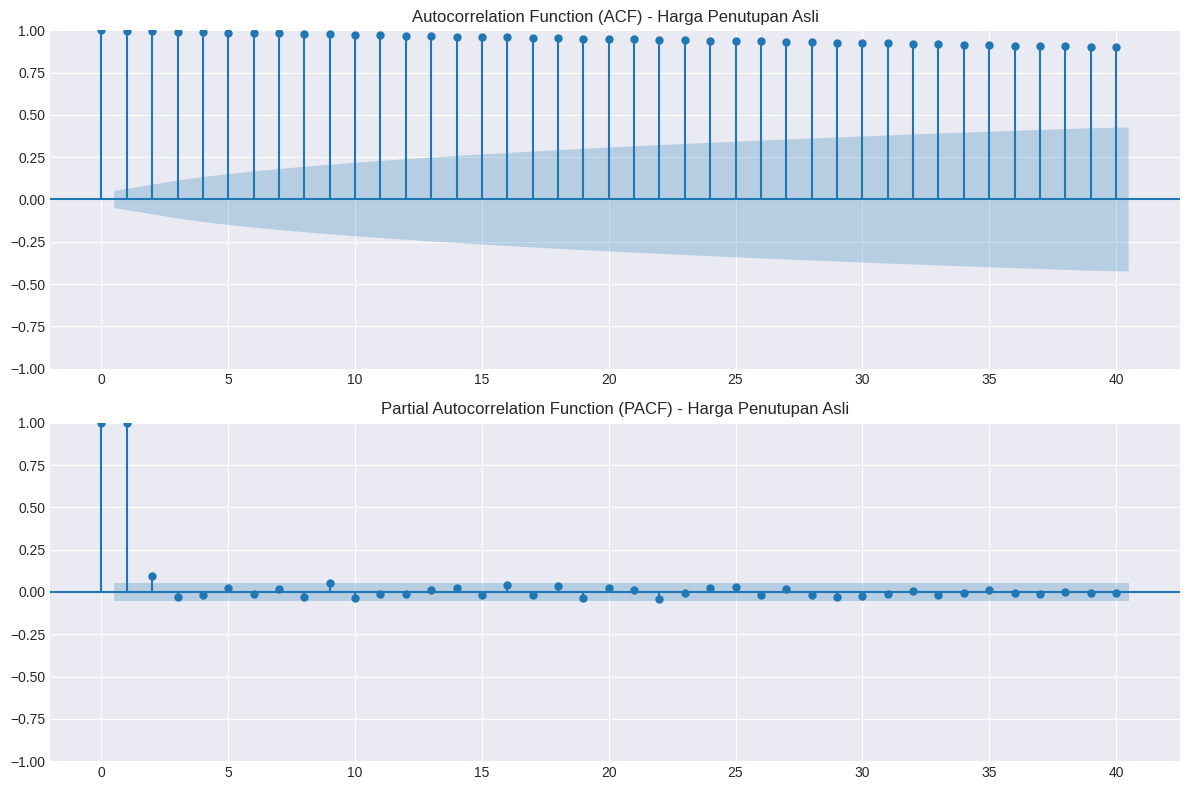


--- Plot ACF dan PACF untuk Harga Penutupan Setelah Differencing Tingkat 1 ---


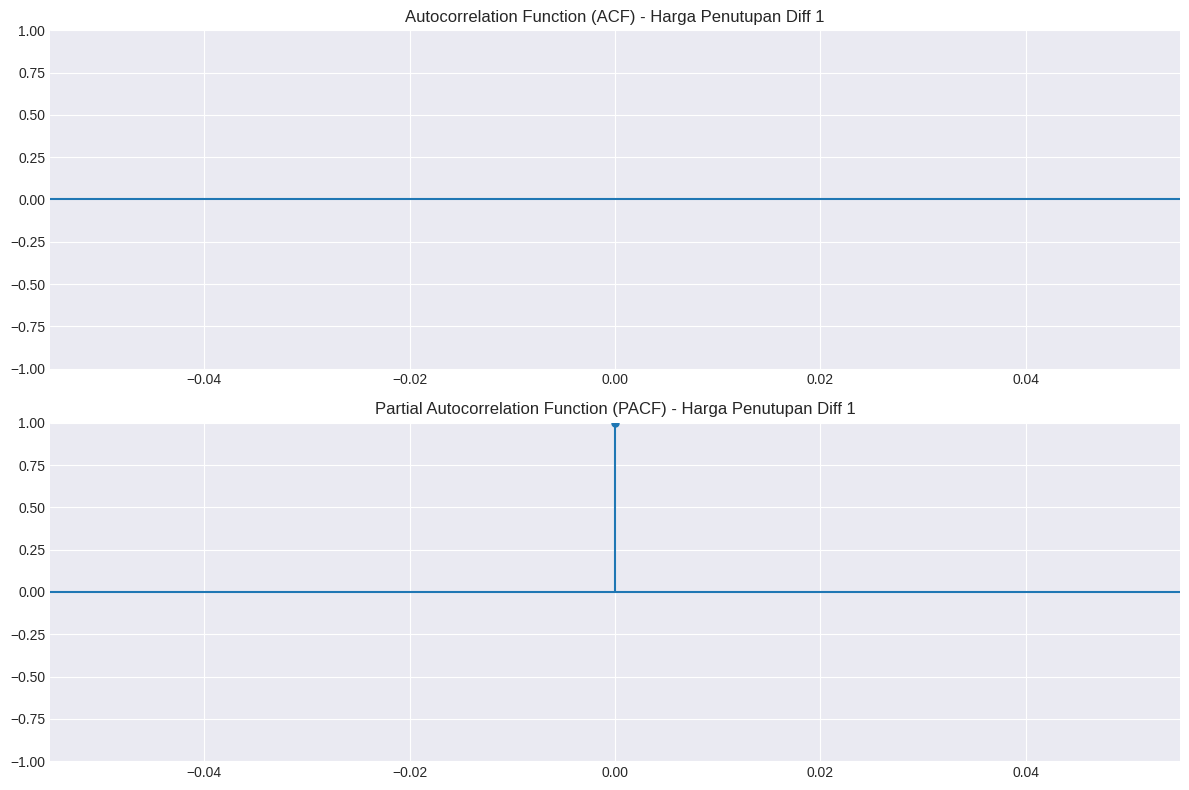

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt # Digunakan oleh statsmodels untuk plot default

# Plot ACF dan PACF untuk harga penutupan asli
print("\n--- Plot ACF dan PACF untuk Harga Penutupan Asli ---")
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Close'], lags=40, ax=axes[0], title='Autocorrelation Function (ACF) - Harga Penutupan Asli')
plot_pacf(df['Close'], lags=40, ax=axes[1], title='Partial Autocorrelation Function (PACF) - Harga Penutupan Asli')
plt.tight_layout()
plt.show()

# Plot ACF dan PACF untuk harga penutupan setelah differencing tingkat 1
print("\n--- Plot ACF dan PACF untuk Harga Penutupan Setelah Differencing Tingkat 1 ---")
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Close_Diff1'], lags=40, ax=axes[0], title='Autocorrelation Function (ACF) - Harga Penutupan Diff 1')
plot_pacf(df['Close_Diff1'], lags=40, ax=axes[1], title='Partial Autocorrelation Function (PACF) - Harga Penutupan Diff 1')
plt.tight_layout()
plt.show()

# 🧩Time Series Modeling (ARIMA)

In [72]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from math import sqrt

train_size = int(len(df) * 0.8)
train_data, test_data = df['Close'][0:train_size], df['Close'][train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")
print(f"Training data period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing data period: {test_data.index.min()} to {test_data.index.max()}")

Ukuran data training: 1208
Ukuran data testing: 303
Periode data training: 2015-04-01 16:00:00 sampai 2020-01-16 16:00:00
Periode data testing: 2020-01-17 16:00:00 sampai 2021-03-31 16:00:00


In [89]:
print("\n--- Finding the Best ARIMA Parameters with auto_arima ---")
model_auto_arima = pm.auto_arima(train_data,
                                 start_p=0, start_q=0, 
                                 max_p=5, max_q=5, 
                                 d=1, seasonal=False, 
                                 trace=True, error_action='ignore', 
                                 suppress_warnings=True, stepwise=True) 

print("\n--- Summary of the Best ARIMA Model ---")
print(model_auto_arima.summary())

# Save the order (p,d,q) of the best model
optimal_order = model_auto_arima.order
print(f"\nThe best ARIMA order found: {optimal_order}")


--- Finding the Best ARIMA Parameters with auto_arima ---
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3949.079, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3934.530, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3930.423, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3955.526, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3921.900, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3920.651, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3921.027, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3920.768, Time=1.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3917.972, Time=1.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3919.543, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3917.379, Time=1.49 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3915.688, Time=1.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3914.077, Time=1.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AI

In [88]:
forecasts = []

history = [x for x in train_data]
for i in range(len(test_data)):
    model = pm.ARIMA(order=optimal_order, seasonal_order=(0,0,0,0)) 
    model_fit = model.fit(history)
    yhat = model_fit.predict(n_periods=1)
    forecasts.append(yhat[0]) 
    obs = test_data.iloc[i]
    history.append(obs)
    print(f'Prediction={yhat[0]:.2f}, Actual={obs:.2f}')
    
forecast_series = pd.Series(forecasts, index=test_data.index)

print("\n--- Prediction Finish ---")
print(forecast_series.head())

Prediction=165.53, Actual=167.10
Prediction=166.71, Actual=166.50
Prediction=166.53, Actual=165.70
Prediction=165.70, Actual=166.72
Prediction=166.51, Actual=165.04
Prediction=165.07, Actual=162.28
Prediction=162.90, Actual=165.46
Prediction=165.36, Actual=168.04
Prediction=167.44, Actual=172.78
Prediction=172.36, Actual=170.23
Prediction=170.08, Actual=174.38
Prediction=174.10, Actual=180.12
Prediction=178.57, Actual=179.90
Prediction=179.39, Actual=183.63
Prediction=183.28, Actual=183.89
Prediction=183.05, Actual=188.70
Prediction=188.22, Actual=184.44
Prediction=184.24, Actual=184.71
Prediction=185.06, Actual=183.71
Prediction=183.31, Actual=185.35
Prediction=185.27, Actual=187.23
Prediction=186.91, Actual=187.28
Prediction=187.31, Actual=184.42
Prediction=184.87, Actual=178.59
Prediction=179.43, Actual=170.89
Prediction=171.77, Actual=168.07
Prediction=168.53, Actual=170.17
Prediction=170.31, Actual=158.18
Prediction=158.78, Actual=162.01
Prediction=162.78, Actual=172.79
Prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=155.25, Actual=149.70
Prediction=151.79, Actual=160.23
Prediction=157.43, Actual=157.71
Prediction=158.39, Actual=152.11


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=155.70, Actual=155.26


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=153.86, Actual=153.83


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=153.95, Actual=165.27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=161.75, Actual=163.49
Prediction=164.36, Actual=165.13
Prediction=165.85, Actual=165.14
Prediction=164.80, Actual=165.51
Prediction=165.53, Actual=173.70
Prediction=170.85, Actual=171.88
Prediction=172.90, Actual=177.04
Prediction=176.18, Actual=178.60
Prediction=178.03, Actual=175.06
Prediction=177.04, Actual=167.82
Prediction=170.28, Actual=173.52
Prediction=170.95, Actual=171.42
Prediction=171.71, Actual=174.55
Prediction=174.30, Actual=174.05
Prediction=174.19, Actual=169.81
Prediction=171.76, Actual=177.43
Prediction=174.61, Actual=179.21
Prediction=178.44, Actual=174.57
Prediction=177.27, Actual=178.84
Prediction=177.42, Actual=180.76
Prediction=179.68, Actual=182.54
Prediction=182.57, Actual=183.60
Prediction=183.54, Actual=184.68
Prediction=184.58, Actual=186.74
Prediction=186.23, Actual=182.51
Prediction=184.24, Actual=179.75
Prediction=180.94, Actual=180.53
Prediction=179.82, Actual=183.16
Prediction=182.16, Actual=184.91
Prediction=184.65, Actual=183.63
Prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=205.35, Actual=205.41
Prediction=204.64, Actual=208.78


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=207.98, Actual=205.05
Prediction=206.73, Actual=202.91
Prediction=204.03, Actual=200.39
Prediction=201.03, Actual=202.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=201.92, Actual=207.42
Prediction=206.09, Actual=200.59


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=203.31, Actual=203.19


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=202.90, Actual=207.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=206.10, Actual=209.44
Prediction=209.53, Actual=207.26
Prediction=208.57, Actual=210.33


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=209.65, Actual=212.46


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=211.84, Actual=206.19


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=208.63, Actual=210.38
Prediction=209.31, Actual=205.91
Prediction=207.05, Actual=209.83


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=209.06, Actual=210.58
Prediction=210.22, Actual=215.81
Prediction=214.66, Actual=221.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=219.94, Actual=222.86
Prediction=223.03, Actual=220.86
Prediction=221.93, Actual=219.66


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=220.01, Actual=219.66


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=219.40, Actual=214.22
Prediction=215.77, Actual=214.65
Prediction=214.41, Actual=214.80
Prediction=214.38, Actual=214.89
Prediction=215.03, Actual=216.23
Prediction=215.96, Actual=210.08
Prediction=212.16, Actual=213.25


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Prediction=212.39, Actual=202.68
Prediction=205.76, Actual=204.72
Prediction=204.31, Actual=202.47
Prediction=202.67, Actual=202.33
Prediction=202.90, Actual=206.43
Prediction=205.39, Actual=216.39
Prediction=213.94, Actual=223.29
Prediction=222.45, Actual=223.72
Prediction=224.91, Actual=218.39
Prediction=220.36, Actual=211.01
Prediction=212.08, Actual=216.55
Prediction=214.04, Actual=215.44
Prediction=215.61, Actual=216.51
Prediction=216.91, Actual=217.23
Prediction=217.10, Actual=214.46
Prediction=215.49, Actual=211.08
Prediction=212.12, Actual=212.42
Prediction=211.90, Actual=210.39
Prediction=211.05, Actual=210.11
Prediction=210.51, Actual=213.86
Prediction=213.00, Actual=213.87
Prediction=214.35, Actual=215.23
Prediction=215.35, Actual=214.07
Prediction=214.51, Actual=216.21
Prediction=215.74, Actual=215.37
Prediction=215.67, Actual=214.24
Prediction=214.77, Actual=214.36
Prediction=214.29, Actual=214.29
Prediction=214.38, Actual=216.01
Prediction=215.72, Actual=211.80
Prediction

In [76]:
# Evaluasi model
rmse = sqrt(mean_squared_error(test_data, forecast_series))
mae = mean_absolute_error(test_data, forecast_series)

print(f'\nRMSE (Root Mean Squared Error): {rmse:.4f}')
print(f'MAE (Mean Absolute Error): {mae:.4f}')

baseline_pred = test_data.shift(1).dropna()
baseline_actual = test_data.iloc[1:] 
rmse_baseline = sqrt(mean_squared_error(baseline_actual, baseline_pred))
mae_baseline = mean_absolute_error(baseline_actual, baseline_pred)

print(f'\nRMSE Baseline (Harga Kemarin): {rmse_baseline:.4f}')
print(f'MAE Baseline (Harga Kemarin): {mae_baseline:.4f}')


RMSE (Root Mean Squared Error): 4.5418
MAE (Mean Absolute Error): 3.3377

RMSE Baseline (Harga Kemarin): 4.6514
MAE Baseline (Harga Kemarin): 3.3771


In [87]:
# Visualization of prediction results
fig_pred = go.Figure()

fig_pred.add_trace(go.Scatter(x=train_data.index, y=train_data, 
                              mode='lines', name='Training Data (Actual)', 
                              line=dict(color='blue')))

fig_pred.add_trace(go.Scatter(x=test_data.index, y=test_data, 
                              mode='lines', name='Testing Data (Actual)', 
                              line=dict(color='green')))

fig_pred.add_trace(go.Scatter(x=forecast_series.index, y=forecast_series, 
                              mode='lines', name='ARIMA Prediction', 
                              line=dict(color='red', dash='dot')))

fig_pred.update_layout(title_text='MSFT Stock Closing Price Prediction with ARIMA Model', 
                       xaxis_title='Date', 
                       yaxis_title='Closing Price (USD)',
                       template='plotly_white', 
                       hovermode='x unified', 
                       legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.8)'))

fig_pred.show()

### Model Evaluation and Prediction Results

After training the ARIMA model with the optimal parameters found by auto_arima, the model performance was evaluated on previously unseen test data using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). Comparisons were also made with a simple baseline model (predicting today’s price to be the same as yesterday’s price).

* ARIMA Model:
    * RMSE: 4.5418
    * MAE: 3.3377
* Baseline Model (Predicting Yesterday’s Price):
    * RMSE: 4.6514
    * MAE: 3.3771

**Interpretation of Results:**

The constructed ARIMA model shows slightly better prediction performance compared to the baseline ‘yesterday’s price’ model on the test data. Although the improvement is not dramatic, it indicates that the ARIMA model manages to capture slightly more structure in the stock price time series compared to the pure random walk assumption.

However, the fact that the improvement is minimal also highlights the complexity and efficiency of the stock market. Stock price movements are often very difficult to predict accurately based only on historical price data itself, because they are influenced by various external factors and unexpected events. These results confirm that although time series models can provide insight, forecasting stock prices with high accuracy remains a major challenge in efficient markets.

# 📌Model Evaluation and Prediction Results


--- Training Optimal ARIMA Model on All Training Data for Residual Analysis ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Number of NaNs in residuals: 0

--- Plot Residuals of ARIMA Model Over Time ---



--- ARIMA Model Residual Distribution Plot ---


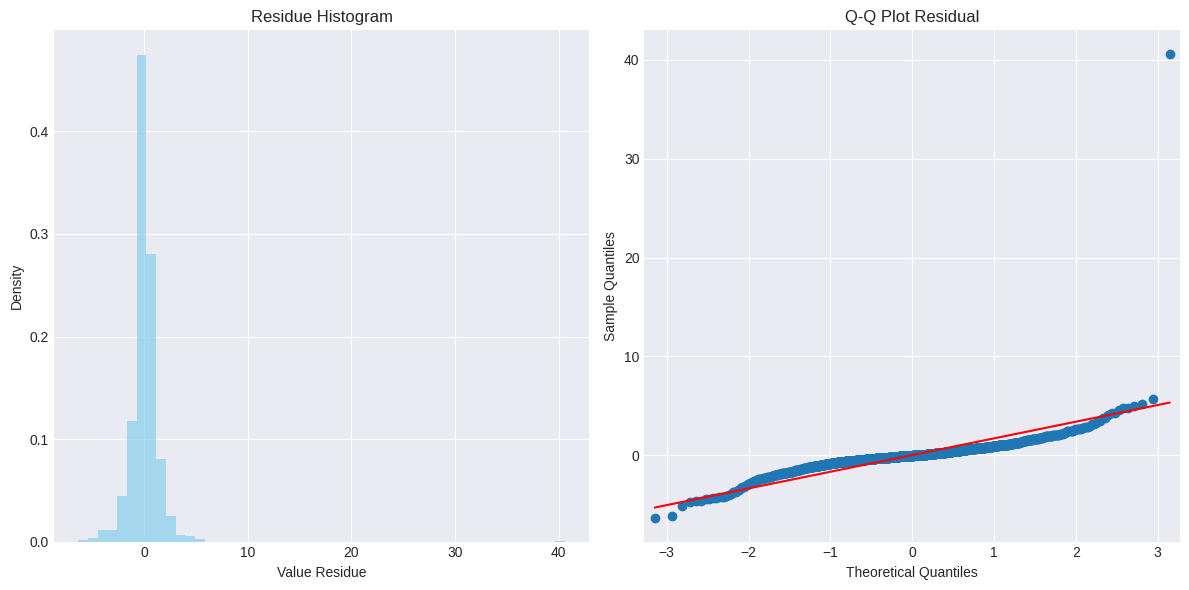


--- Plot ACF and PACF Residuals of ARIMA Model ---


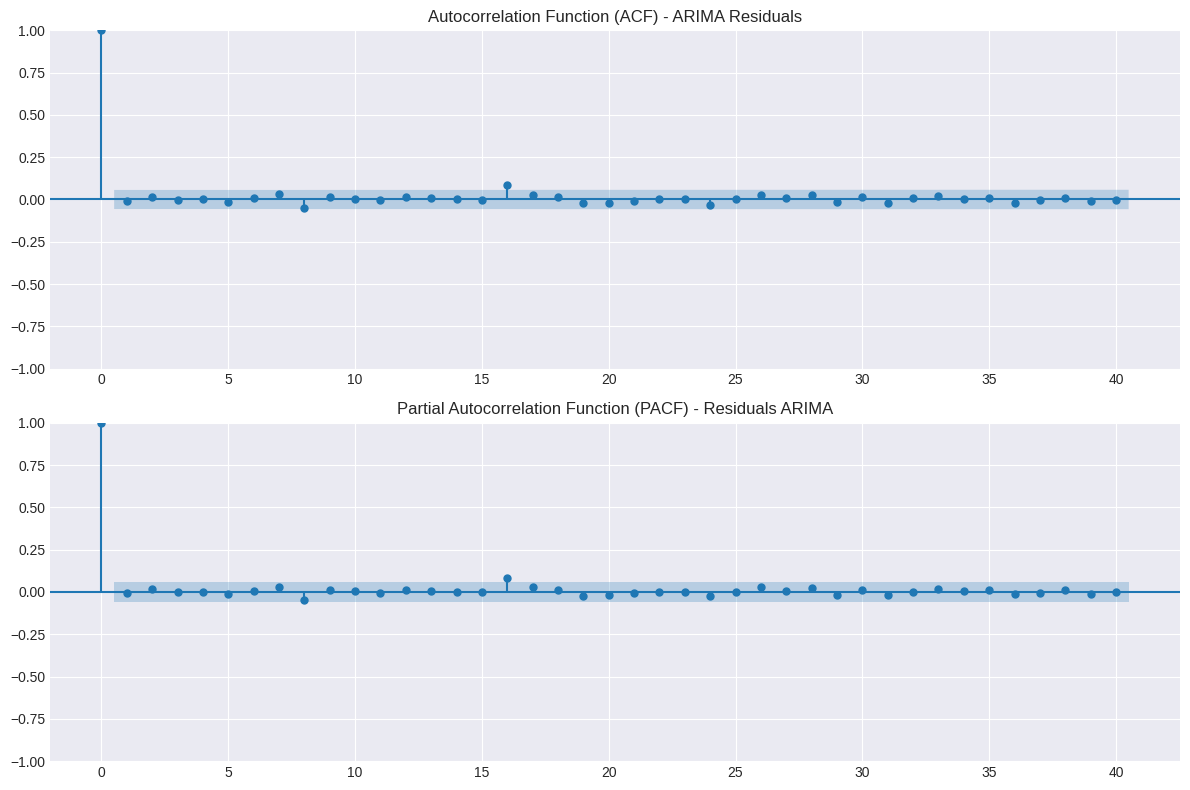


--- Ljung-Box Test on ARIMA Model Residuals ---
      lb_stat  lb_pvalue
20  15.888782     0.7235

Ljung-Box Test Results: p-value (0.7235) > 0.05.
We FAILED to reject H0. This indicates that the residuals are most likely white noise (no significant autocorrelation).


In [86]:
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot
from statsmodels.stats.diagnostic import acorr_ljungbox # For Ljung-Box test

print("\n--- Training Optimal ARIMA Model on All Training Data for Residual Analysis ---")
model_fit_full_train = pm.ARIMA(order=optimal_order, seasonal_order=(0,0,0,0)).fit(train_data)

residuals = pd.Series(model_fit_full_train.resid(), index=train_data.index)

print(f"Number of NaNs in residuals: {residuals.isnull().sum()}")
residuals = residuals.dropna()

print("\n--- Plot Residuals of ARIMA Model Over Time ---")
fig_res_time = go.Figure()
fig_res_time.add_trace(go.Scatter(x=residuals.index, y=residuals, mode='lines', name='Residuals'))
fig_res_time.update_layout(title_text='ARIMA Model Residuals Over Time', 
xaxis_title='Date', 
yaxis_title='Residue', 
template='plotly_white')
fig_res_time.show()

print("\n--- ARIMA Model Residual Distribution Plot ---")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title('Residue Histogram')
plt.xlabel('Value Residue')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot Residual')
plt.tight_layout()
plt.show()

print("\n--- Plot ACF and PACF Residuals of ARIMA Model ---")
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, lags=40, ax=axes[0], title='Autocorrelation Function (ACF) - ARIMA Residuals')
plot_pacf(residuals, lags=40, ax=axes[1], title='Partial Autocorrelation Function (PACF) - Residuals ARIMA')
plt.tight_layout()
plt.show()

print("\n--- Ljung-Box Test on ARIMA Model Residuals ---")
ljung_box_results = acorr_ljungbox(residuals, lags=[20], return_df=True)
print(ljung_box_results)

p_value_ljungbox = ljung_box_results['lb_pvalue'].iloc[0]
if p_value_ljungbox > 0.05:
    print(f"\nLjung-Box Test Results: p-value ({p_value_ljungbox:.4f}) > 0.05.")
    print("We FAILED to reject H0. This indicates that the residuals are most likely white noise (no significant autocorrelation).")
else:
    print(f"\nLjung-Box Test Results: p-value ({p_value_ljungbox:.4f}) <= 0.05.")
    print("We REJECT H0. This shows that the residuals still have significant autocorrelation (not white noise).")

### ARIMA Model Residuals Diagnostic Analysis

To validate the adequacy of the ARIMA model, a thorough analysis of the residuals (the difference between the actual and model-predicted values) is performed. Ideal residuals should resemble ‘white noise’ (uncorrelated, zero mean, and constant variance), indicating that the model has captured all relevant patterns.

* **Time Residuals Plot:** The residuals show random fluctuations around zero with no clear trend or pattern. This indicates that the ARIMA model has successfully removed the deterministic component from the stock price time series.

* **Distribution of Residuals:** The histogram of residuals appears centered around zero with a bell-shaped shape. The Q-Q plot shows that although most of the residuals are close to a normal distribution, there are deviations in the tails (the ends of the plot), indicating the presence of ‘fat tails’ or extreme events that occur more frequently than expected by a normal distribution. This phenomenon is common and expected in financial data.

* **Autocorrelation of Residuals:** Both ACF and PACF plots of residuals show that most of the correlation bars fall within the blue confidence bands, indicating no significant autocorrelation remaining. This is a strong indicator that the ARIMA model has effectively captured all the linear dependencies in the data.

* **Ljung-Box Test:** The Ljung-Box Test result (p-value = 0.7235 at lags=20) is greater than 0.05, thus we fail to reject the null hypothesis. This statistically confirms that the residuals of the model are white noise, i.e., no significant autocorrelation is detected.

#### Conclusion from Residual Analysis:
The diagnostic analysis of residuals confirms that the constructed ARIMA model is adequate in capturing the linear autocorrelation structure and trend in MSFT stock prices. Although the residuals exhibit non-normality with 'fat tails' (which is common to financial data and may require a volatility model such as GARCH), the absence of remaining autocorrelation indicates that the ARIMA model has successfully extracted information that can be modeled linearly.

# 📃Final Summary
## 📜Final Project Conclusion: Microsoft (MSFT) Stock Price Analysis and Modeling 2015-2021

This project conducted an in-depth analysis of Microsoft (MSFT) stock price movements from 2015 to 2021, employing a comprehensive approach from both a Data Analyst and Data Scientist perspective.

### **From a Data Analyst Perspective**:
* **Strong and Consistent Upward Trend:**
    Initial analysis of the closing prices and candlestick charts clearly demonstrated a robust and sustained upward trend in MSFT's stock price throughout the 2015-2021 period, with a noticeable acceleration from late 2019 to 2021. This indicates exceptional fundamental performance by the company and high investor confidence.

* **Volatility and Market Responsiveness:**
    While the overall trend was positive, periods of significant volatility were observed. Minor price dips in late 2018 (possibly related to macroeconomic issues) and a sharper decline in early 2020 (due to the COVID-19 pandemic) highlighted the market's sensitivity to external events. However, the swift post-pandemic recovery underscored MSFT's resilience.

* **Trading Volume Activity:**
    The trading volume chart revealed that substantial spikes in volume often coincided with periods of significant price movement, particularly during the market turmoil of early 2020. This confirms high investor participation during these crucial moments.

* **Intraday vs. Inter-day:**
    Price Movement: Observations from the candlestick chart indicated that while daily price movements (Open-Close difference) tended to be stable, significant price increases largely occurred gradually between days, suggesting steady growth.

### **From a Data Scientist Perspective:**
- Time Series Decomposition:

    * **Trend as the Dominant Component:** Decomposition of the closing prices confirmed that the trend component was the most dominant factor explaining MSFT's stock price movement. This trend exhibited a clear, accelerating exponential growth.

    * **Insignificant Seasonality:** Analysis showed no significant seasonal patterns influencing MSFT's stock price, indicating that price movements are driven more by fundamental and stochastic factors rather than recurring time-based patterns.

    * **Residuals as Volatility Indicator:** The residual component, while appearing random, displayed periods of varying volatility, notably a surge in early 2020, reflecting market responses to unforeseen events.

- Stationarity and Data Transformation:

    * **Non-Stationarity of Original Data:** The Augmented Dickey-Fuller (ADF) test (p-value: 0.9982) and the ACF plot of the original closing prices definitively confirmed that the time series was non-stationary due to the presence of a strong trend.

    * **Stationarity Through Differencing:** By applying first-order differencing (d=1), the time series was successfully made stationary (ADF test p-value: 0.0000). This is a fundamental step for applying time series models like ARIMA.

    * **Absence of Autocorrelation:** The ACF and PACF plots of the differenced data demonstrated the absence of significant autocorrelation, indicating that all linear dependencies within the data had been successfully removed.

- ARIMA Modeling and Performance Evaluation:

    * **Model Selection:** An ARIMA model was built using optimal parameters identified by auto_arima, leveraging the stationarity analysis (d=1).

    * **Model Performance:** The ARIMA model showed slightly better predictive performance compared to a 'previous day' baseline model (ARIMA RMSE: 4.5418 vs. Baseline: 4.6514; ARIMA MAE: 3.3377 vs. Baseline: 3.3771). While the improvement was modest, it suggests the model captured a small portion of predictable patterns beyond a pure random walk.

    * **Residual Analysis:** Diagnostic analysis of the residuals indicated that the ARIMA model was sufficiently adequate. Residuals fluctuated randomly around zero with no significant autocorrelation (Ljung-Box test p-value: 0.7235 > 0.05). Although the residuals exhibited 'fat tails' in their distribution (common in financial data), the model successfully explained the linear structure of the data.

### **Conclusion and Recommendations**

This project successfully analyzed and modeled Microsoft's stock price, identifying a strong upward trend as the dominant component and validating the adequacy of the ARIMA model in capturing linear patterns. The inherent challenges in accurately forecasting stock prices lie in the efficient market's random walk nature and the impact of unforeseen events reflected in the residual fluctuations.

For future development, it is recommended to explore:

Volatility Models: Employing GARCH (Generalized Autoregressive Conditional Heteroskedasticity) models to explicitly model the observed non-constant volatility in residuals.

Exogenous Variables: Incorporating macroeconomic indicators, sentiment news, or other market indices (e.g., ARIMAX) to enhance the model's predictive power.

Non-Linear Models: Considering Machine Learning or Deep Learning approaches (such as LSTMs) to capture potential non-linear patterns within the data.

Overall, this project demonstrates proficiency in exploratory data analysis, advanced time series processing, predictive modeling, and model evaluation, which are core skills for a Data Analyst and Data Scientist professional.